<a href="https://colab.research.google.com/github/lemonjie/class_image_hw/blob/playground/stitching_image/test0427_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : Linear Rrgression using Pytorch

## Step 1 : Import library and data

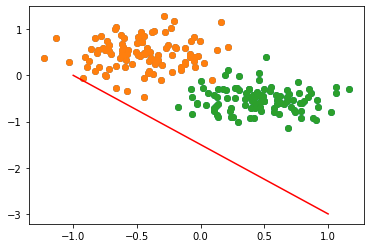

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# generate some random data
n_pts = 200
centers = [[-0.5,0.5], [0.5,-0.5]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.3) # optput:numpy
tensorX = torch.Tensor(X) # numpy -> tensor
tensorY = torch.Tensor(y.reshape(n_pts,1)) # numpy -> tensor

def plotFunc(w1=3,w2=2,b1=3):
  plt.scatter(X[:,0],X[:,1])
  plt.scatter(X[y==0,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])
  x1 = np.array([-1,1])
  x2 = (w1 * x1 + b1) / (-w2) # w1*x1 + w2*x2 + b1 = 0

  plt.plot(x1,x2,'r') # 隨便畫一條線，以後用神經網路訓練出分割線
  plt.show()

plotFunc()

## Step 2 : Preprocessing

In [ ]:
# skip

## Step 3 : Build Model
- use GPU to train
  - model.to(device), inputs.to(device), labels.to(device)
  - device = 'cuda:0' if torch.cuda.is_avalible() else 'cpu' print('GPU state:',device)

myModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
-0.28438299894332886 0.2622758746147156 0.36199378967285156


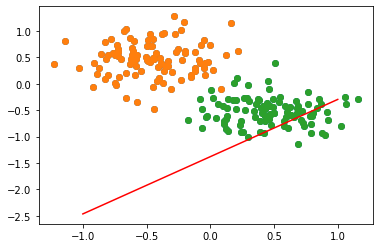

In [ ]:
# forward path for the model
class myModel(nn.Module):
  def __init__(self, in_size=2, out_size=1):
    super().__init__()
    self.linear = nn.Linear(in_size, out_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0

model = myModel()
preY = model(tensorX) # hook : check memory and something, then call forward
print(model)

def get_params(model):
  [w,b] = model.parameters()
  w1,w2 = w.view(2) # reshape
  w1 = w1.item()
  w2 = w2.item()
  b1 = b[0].item()
  print(w1,w2,b1)
  return w1,w2,b1

w1,w2,b1 = get_params(model)

plotFunc(w1,w2,b1)

## Step 4 : Training model

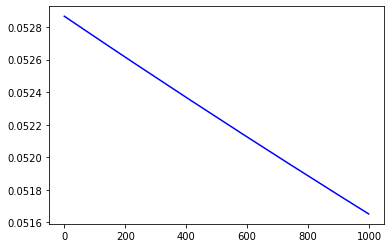

5.011239528656006 -4.807124614715576 -0.1824057400226593
0.05165235698223114


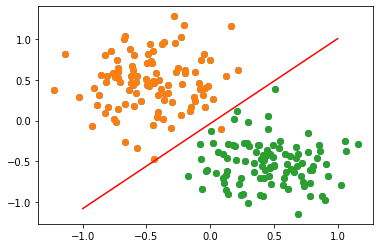

In [ ]:
# backward path for the model

criterion = nn.BCELoss() # binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
for epoch in range(1000):
  y_pred = model(tensorX) # model(X) 會幫忙做效能IO的檢查
  loss = criterion(y_pred,tensorY)

  losses.append(loss.item())
  # 1. reset w.grad
  optimizer.zero_grad()
  # 2. fill in w.grad
  loss.backward()
  # 3. update w
  optimizer.step()

plt.plot(range(1000),losses,'b')
plt.show()

w1,w2,b1 = get_params(model)
print(losses[-1])
plotFunc(w1,w2,b1)